EDA and Feature Engineering

In [63]:
#importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [65]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [67]:
#loading the Data Set
solar_data = pd.read_csv(r"C:\Users\bathl\OneDrive\Documents\SJSU\Machine_Learning\Project\solar_data.csv")

In [69]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                5397 non-null   int64  
 1   County            5397 non-null   object 
 2   Acres             5397 non-null   float64
 3   InstallType       5397 non-null   object 
 4   UrbanRural        5397 non-null   object 
 5   Class             5397 non-null   object 
 6   DistSub_100       5397 non-null   float64
 7   Percent_100       5397 non-null   object 
 8   Substation_100    5397 non-null   object 
 9   HIFLD_100         5397 non-null   float64
 10  DistSub_200       5397 non-null   float64
 11  Percent_200       5397 non-null   object 
 12  Substation_200    5397 non-null   object 
 13  HIFLD_200         5397 non-null   int64  
 14  DistSub_CAISO     5397 non-null   float64
 15  Percent_CAISO     5397 non-null   object 
 16  Substation_CAISO  5387 non-null   object 


In [71]:
solar_data.head(5)

,ID,County,Acres,InstallType,UrbanRural,Class,DistSub_100,Percent_100,Substation_100,HIFLD_100,...,Percent_200,Substation_200,HIFLD_200,DistSub_CAISO,Percent_CAISO,Substation_CAISO,HIFLD_CAISO,SolarTech,Area,Length
0,1,Alameda,1.672639,Rooftop,Urban,Rooftop - Urban,0.162732,0-25,Dixon Landing,309200.0,...,0-25,Los Esteros,310258,2.272283,0-25,Los Esteros,310258,Within,6768.954679,365.801336
1,2,Alameda,1.897078,Rooftop,Urban,Rooftop - Urban,0.226728,0-25,Dixon Landing,309200.0,...,0-25,Los Esteros,310258,2.392816,0-25,Los Esteros,310258,Within,7677.228982,366.909878
2,3,Alameda,1.275783,Rooftop,Urban,Rooftop - Urban,0.426104,0-25,Dixon Landing,309200.0,...,0-25,Los Esteros,310258,2.537298,0-25,Los Esteros,310258,Within,5162.935990,290.576263
3,4,Alameda,1.424286,Rooftop,Urban,Rooftop - Urban,0.491306,0-25,Dixon Landing,309200.0,...,0-25,Los Esteros,310258,2.626699,0-25,Los Esteros,310258,Within,5763.905754,344.705846
4,5,Alameda,0.984429,Rooftop,Urban,Rooftop - Urban,0.795822,0-25,Dixon Landing,309200.0,...,0-25,Los Esteros,310258,2.728629,25-50,Los Esteros,310258,Within,3983.859693,283.968425


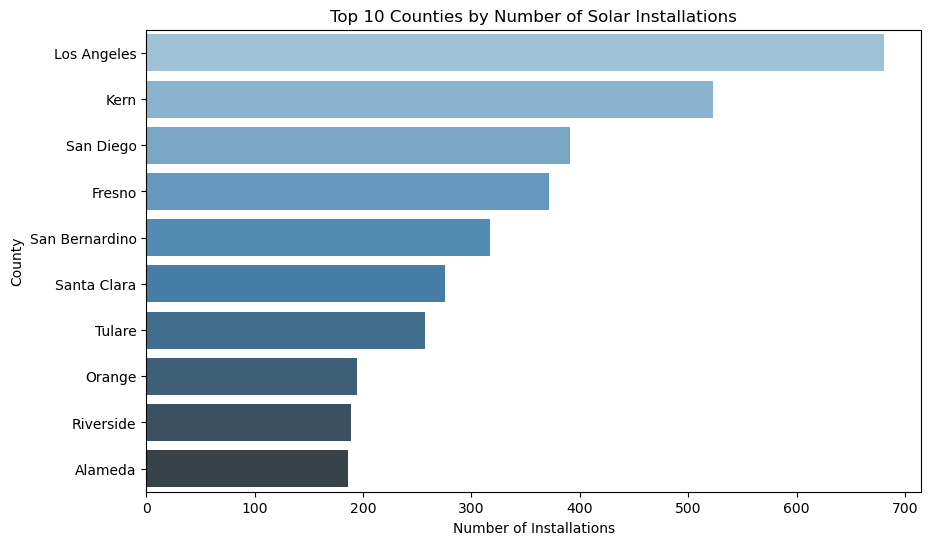

In [73]:
# Top counties with the most solar installations
# Group the data by county
county_installations = solar_data.groupby('County').size().reset_index(name='installation_count')

# Sort the data
county_installations = county_installations.sort_values(by='installation_count', ascending=False)

# Plot the top counties with the most solar installations
plt.figure(figsize=(10, 6))

sns.barplot(x='installation_count', y='County', data=county_installations.head(10), palette='Blues_d', legend=False)

plt.title('Top 10 Counties by Number of Solar Installations')
plt.xlabel('Number of Installations')
plt.ylabel('County')
plt.show()


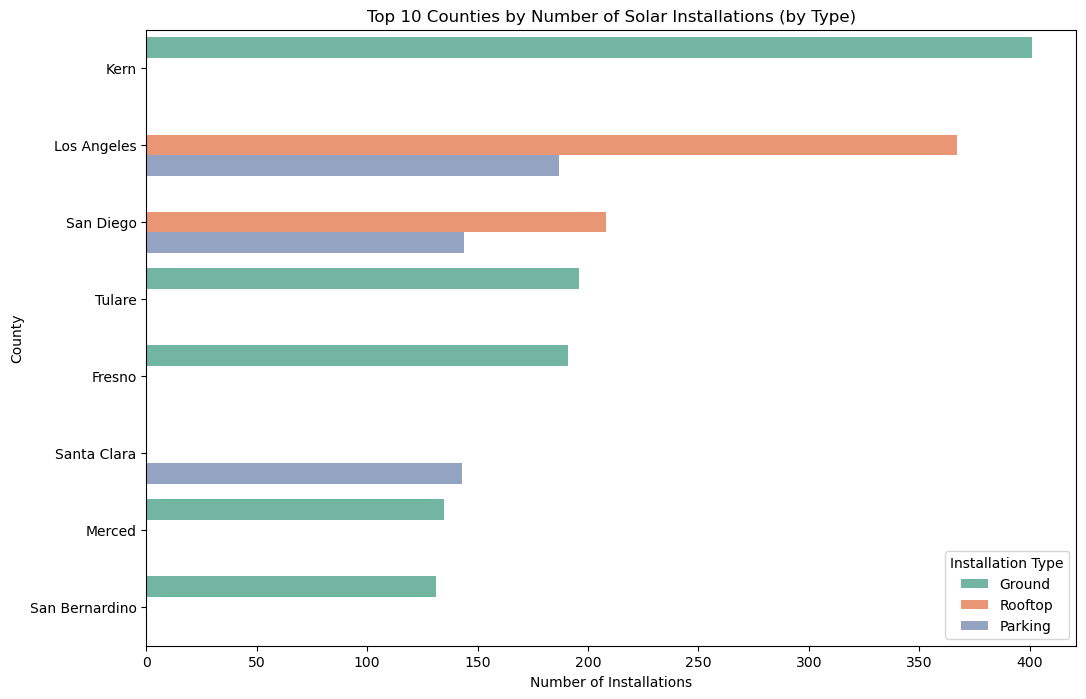

In [74]:
# Top counties with the most solar installations by install type
# Group the data by county and installation type
county_installations = solar_data.groupby(['County', 'InstallType']).size().reset_index(name='installation_count')

# Sort the data 
county_installations = county_installations.sort_values(by='installation_count', ascending=False)

plt.figure(figsize=(12, 8))

# Use of 'InstallType' as the hue for differentiation
sns.barplot(x='installation_count', y='County', hue='InstallType', data=county_installations.head(10), palette='Set2')

plt.title('Top 10 Counties by Number of Solar Installations (by Type)')
plt.xlabel('Number of Installations')
plt.ylabel('County')
plt.legend(title='Installation Type')
plt.show()


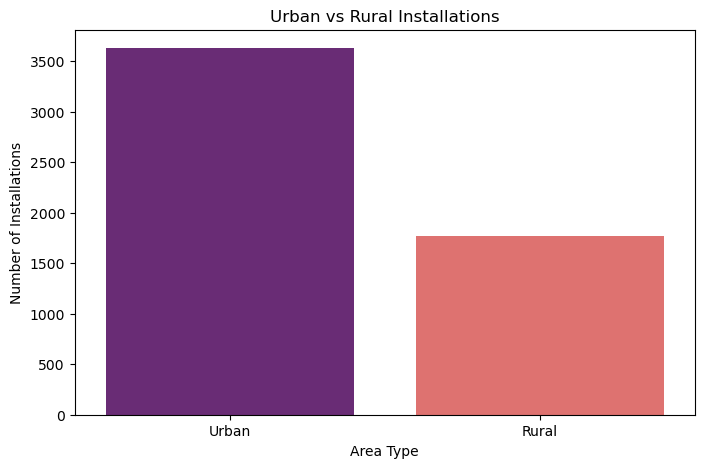

In [75]:
# Plot for Urban vs Rural Installations
plt.figure(figsize=(8, 5))
sns.countplot(x='UrbanRural', data=solar_data, palette='magma')
plt.title('Urban vs Rural Installations')
plt.xlabel('Area Type')
plt.ylabel('Number of Installations')
plt.show()


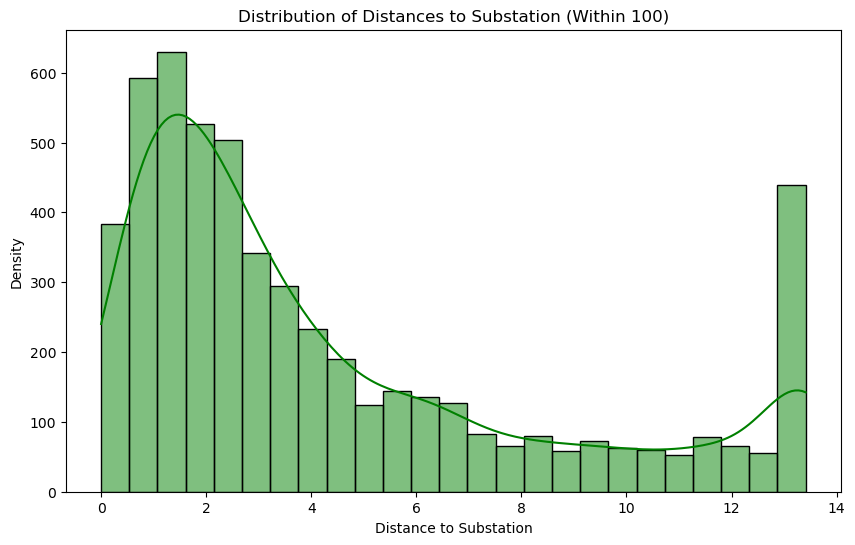

In [77]:
# Plot for Distribution of Distances to Substation 
plt.figure(figsize=(10, 6))
sns.histplot(solar_data['DistSub_100'], kde=True, color='green')
plt.title('Distribution of Distances to Substation (Within 100)')
plt.xlabel('Distance to Substation')
plt.ylabel('Density')
plt.show()


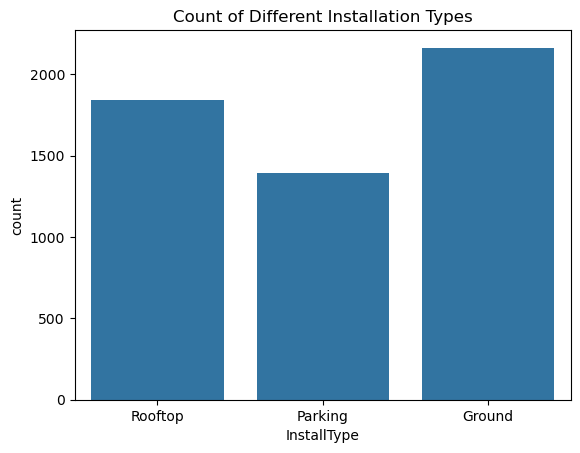

In [78]:
# Plot for installation types
sns.countplot(x='InstallType', data=solar_data)
plt.title('Count of Different Installation Types')
plt.show()


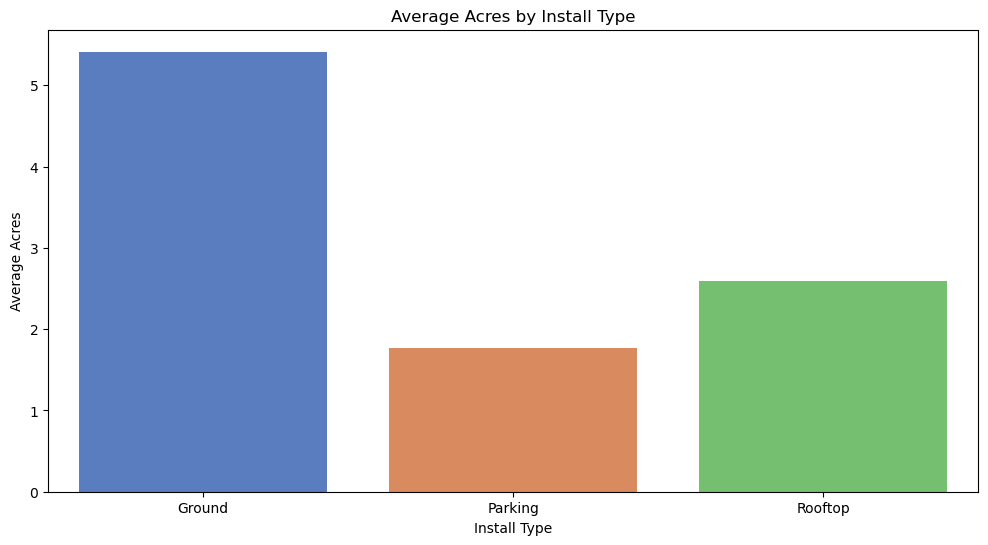

In [79]:
# Plot for Acres by Install Type
# Calculate mean acres by installation type
mean_acres = solar_data.groupby('InstallType')['Acres'].mean().reset_index()

# Bar plot of mean Acres by Install Type
plt.figure(figsize=(12, 6))
sns.barplot(x='InstallType', y='Acres', data=mean_acres, palette='muted')
plt.title('Average Acres by Install Type')
plt.ylabel('Average Acres')
plt.xlabel('Install Type')
plt.show()


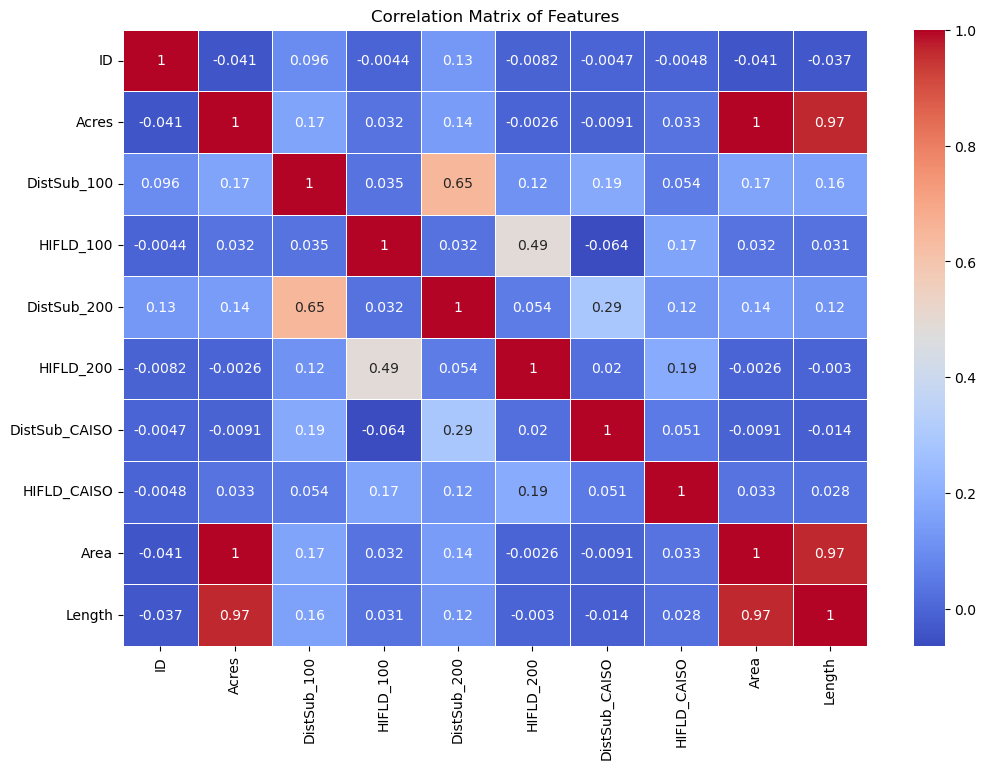

In [80]:
# Correlation Matrix
# Select only numeric columns for the correlation matrix
numeric_solar_data = solar_data.select_dtypes(include=[float, int])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_solar_data.corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


Since, Area and Acres are perfectly correlated, we can say that both the features bring redundacy in the dataset, and it would be better to drop one of them for the better performance and accuracy.
    

In [86]:
# Drop Acres as it is perfectly correlated with Area
solar_data = solar_data.drop(columns=['Acres'])

In [90]:
solar_data.head()

,ID,County,InstallType,UrbanRural,Class,DistSub_100,Percent_100,Substation_100,HIFLD_100,DistSub_200,Percent_200,Substation_200,HIFLD_200,DistSub_CAISO,Percent_CAISO,Substation_CAISO,HIFLD_CAISO,SolarTech,Area,Length
0,1,Alameda,Rooftop,Urban,Rooftop - Urban,0.162732,0-25,Dixon Landing,309200.0,2.272283,0-25,Los Esteros,310258,2.272283,0-25,Los Esteros,310258,Within,6768.954679,365.801336
1,2,Alameda,Rooftop,Urban,Rooftop - Urban,0.226728,0-25,Dixon Landing,309200.0,2.392816,0-25,Los Esteros,310258,2.392816,0-25,Los Esteros,310258,Within,7677.228982,366.909878
2,3,Alameda,Rooftop,Urban,Rooftop - Urban,0.426104,0-25,Dixon Landing,309200.0,2.537298,0-25,Los Esteros,310258,2.537298,0-25,Los Esteros,310258,Within,5162.935990,290.576263
3,4,Alameda,Rooftop,Urban,Rooftop - Urban,0.491306,0-25,Dixon Landing,309200.0,2.626699,0-25,Los Esteros,310258,2.626699,0-25,Los Esteros,310258,Within,5763.905754,344.705846
4,5,Alameda,Rooftop,Urban,Rooftop - Urban,0.795822,0-25,Dixon Landing,309200.0,2.728629,0-25,Los Esteros,310258,2.728629,25-50,Los Esteros,310258,Within,3983.859693,283.968425


Feature Engineering

In [93]:
#Creating bins for DistSub_100, DistSub_200, and DistSub_CAISO can simplify distance impacts and make it easier to capture proximity categories.
solar_data['DistSub_100_binned'] = pd.cut(solar_data['DistSub_100'], bins=[0, 1, 5, 10, 20, float('inf')], labels=['very close', 'close', 'moderate', 'far', 'very far'])
solar_data['DistSub_200_binned'] = pd.cut(solar_data['DistSub_200'], bins=[0, 1, 5, 10, 20, float('inf')], labels=['very close', 'close', 'moderate', 'far', 'very far'])
solar_data['DistSub_CAISO_binned'] = pd.cut(solar_data['DistSub_CAISO'], bins=[0, 1, 5, 10, 20, float('inf')], labels=['very close', 'close', 'moderate', 'far', 'very far'])


In [95]:
solar_data.head()

,ID,County,InstallType,UrbanRural,Class,DistSub_100,Percent_100,Substation_100,HIFLD_100,DistSub_200,...,DistSub_CAISO,Percent_CAISO,Substation_CAISO,HIFLD_CAISO,SolarTech,Area,Length,DistSub_100_binned,DistSub_200_binned,DistSub_CAISO_binned
0,1,Alameda,Rooftop,Urban,Rooftop - Urban,0.162732,0-25,Dixon Landing,309200.0,2.272283,...,2.272283,0-25,Los Esteros,310258,Within,6768.954679,365.801336,very close,close,close
1,2,Alameda,Rooftop,Urban,Rooftop - Urban,0.226728,0-25,Dixon Landing,309200.0,2.392816,...,2.392816,0-25,Los Esteros,310258,Within,7677.228982,366.909878,very close,close,close
2,3,Alameda,Rooftop,Urban,Rooftop - Urban,0.426104,0-25,Dixon Landing,309200.0,2.537298,...,2.537298,0-25,Los Esteros,310258,Within,5162.935990,290.576263,very close,close,close
3,4,Alameda,Rooftop,Urban,Rooftop - Urban,0.491306,0-25,Dixon Landing,309200.0,2.626699,...,2.626699,0-25,Los Esteros,310258,Within,5763.905754,344.705846,very close,close,close
4,5,Alameda,Rooftop,Urban,Rooftop - Urban,0.795822,0-25,Dixon Landing,309200.0,2.728629,...,2.728629,25-50,Los Esteros,310258,Within,3983.859693,283.968425,very close,close,close


In [101]:
# Separate numerical and categorical features
numerical_features = solar_data.select_dtypes(include=['int64', 'float64']).columns.drop('ID').tolist()
categorical_features = solar_data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['DistSub_100', 'HIFLD_100', 'DistSub_200', 'HIFLD_200', 'DistSub_CAISO', 'HIFLD_CAISO', 'Area', 'Length']
Categorical Features: ['County', 'InstallType', 'UrbanRural', 'Class', 'Percent_100', 'Substation_100', 'Percent_200', 'Substation_200', 'Percent_CAISO', 'Substation_CAISO', 'SolarTech', 'DistSub_100_binned', 'DistSub_200_binned', 'DistSub_CAISO_binned']


One-hot Encoding

In [104]:
solar_data = pd.get_dummies(solar_data, columns=categorical_features, drop_first=False,dtype=int)

In [106]:
solar_data.head()

,ID,DistSub_100,HIFLD_100,DistSub_200,HIFLD_200,DistSub_CAISO,HIFLD_CAISO,Area,Length,County_Alameda,...,DistSub_200_binned_very close,DistSub_200_binned_close,DistSub_200_binned_moderate,DistSub_200_binned_far,DistSub_200_binned_very far,DistSub_CAISO_binned_very close,DistSub_CAISO_binned_close,DistSub_CAISO_binned_moderate,DistSub_CAISO_binned_far,DistSub_CAISO_binned_very far
0,1,0.162732,309200.0,2.272283,310258,2.272283,310258,6768.954679,365.801336,1,...,0,1,0,0,0,0,1,0,0,0
1,2,0.226728,309200.0,2.392816,310258,2.392816,310258,7677.228982,366.909878,1,...,0,1,0,0,0,0,1,0,0,0
2,3,0.426104,309200.0,2.537298,310258,2.537298,310258,5162.935990,290.576263,1,...,0,1,0,0,0,0,1,0,0,0
3,4,0.491306,309200.0,2.626699,310258,2.626699,310258,5763.905754,344.705846,1,...,0,1,0,0,0,0,1,0,0,0
4,5,0.795822,309200.0,2.728629,310258,2.728629,310258,3983.859693,283.968425,1,...,0,1,0,0,0,0,1,0,0,0


Scaling: StandardScaler

Scaling the variables so that they have a mean of 0 and a standard deviation of 1

In [109]:
scaler = StandardScaler()

solar_data[numerical_features] = scaler.fit_transform(solar_data[numerical_features])

In [111]:
solar_data.head()

,ID,DistSub_100,HIFLD_100,DistSub_200,HIFLD_200,DistSub_CAISO,HIFLD_CAISO,Area,Length,County_Alameda,...,DistSub_200_binned_very close,DistSub_200_binned_close,DistSub_200_binned_moderate,DistSub_200_binned_far,DistSub_200_binned_very far,DistSub_CAISO_binned_very close,DistSub_CAISO_binned_close,DistSub_CAISO_binned_moderate,DistSub_CAISO_binned_far,DistSub_CAISO_binned_very far
0,1,-1.051286,1.078414,-0.877077,1.294544,-0.869591,1.589278,-0.534259,-0.455304,1,...,0,1,0,0,0,0,1,0,0,0
1,2,-1.035324,1.078414,-0.859795,1.294544,-0.843698,1.589278,-0.469035,-0.451893,1,...,0,1,0,0,0,0,1,0,0,0
2,3,-0.985595,1.078414,-0.839080,1.294544,-0.812660,1.589278,-0.649590,-0.686802,1,...,0,1,0,0,0,0,1,0,0,0
3,4,-0.969332,1.078414,-0.826262,1.294544,-0.793455,1.589278,-0.606433,-0.520224,1,...,0,1,0,0,0,0,1,0,0,0
4,5,-0.893378,1.078414,-0.811647,1.294544,-0.771558,1.589278,-0.734261,-0.707137,1,...,0,1,0,0,0,0,1,0,0,0


In [113]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Columns: 1108 entries, ID to DistSub_CAISO_binned_very far
dtypes: float64(8), int32(1099), int64(1)
memory usage: 23.0 MB


In [117]:
solar_data.to_csv(r"C:\Users\bathl\OneDrive\Documents\SJSU\Machine_Learning\Project\solar_data_transformed.csv", index=False)